# **Euristica**

Una **euristica** è un metodo o una strategia di risoluzione di problemi che può non garantire una soluzione ottima ma è concepito per essere pratico, efficiente e talvolta ragionevolmente efficace nella risoluzione di problemi complessi. Le euristiche sono spesso utilizzate quando il problema è troppo grande per essere risolto con algoritmi esatti in un tempo ragionevole.

**Nearest Neighbor** è una semplice euristica utilizzata principalmente per risolvere problemi di percorso, come il problema del commesso viaggiatore (TSP). Il principio di base è quello di selezionare il succesivo nodo da visitare come quello più vicino rispetto all nodo corrente, evitando di ritornare in nodi già visitati.

L'algoritmo di **Clarke and Wright** è una tecnica euristica per risolvere il problema del Vehicle Routing (VRP). L'idea fondamentale è quella di raggruppare le consegne in cluster ottimizzati, riducendo il numero di veicoli necessari e minimizzando i costi totali di trasporto. L'algoritmo si basa sui "savings", ossia il risparmio nei costi quando si combinano le consegne di due percorsi.

**3-opt** è una tecnica di ottimizzazione euristica utilizzata principalmente per migliorare le soluzioni iniziali nei problemi che coinvolgono il percorso (come il TSP o VRP). L'approccio di 3-opt si concentra sulla ricerca di miglioramenti locali attraverso la sostituzione di tre archi in una soluzione corrente con altri tre archi, migliorando così la lunghezza del percorso o la qualità complessiva della soluzione.

### Lettura dati da file

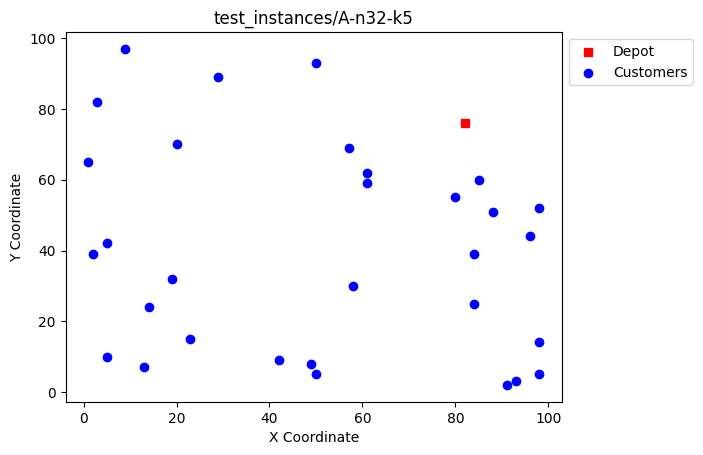

In [14]:
import numpy as np

filename = "test_instances/A-n32-k5"
#filename = "test_instances/P-n45-k5"
#filename = "test_instances/A-n62-k8" 
#filename = "test_instances/A-n80-k10" 
#filename = "test_instances/P-n101-k4" 

#Lettura soluzione

file_sol = open(filename + ".sol", "r")
line_sol = file_sol.readlines()

rowInd = 0

while not line_sol[rowInd].startswith("Cost"):
        rowInd =  rowInd + 1

solution_cost = int(line_sol[rowInd].split()[1])

#Lettura istanza

file = open(filename + ".vrp", "r")
line = file.readlines()

k = int(filename[-1])
coordinates = {}


demands = {}

rowInd = 0
while not line[rowInd].startswith("EOF"):
    if line[rowInd].startswith("DIMENSION") :
        n = int(line[rowInd].split()[2])
        rowInd =  rowInd + 1
    elif line[rowInd].startswith("CAPACITY") :
        Q = int(line[rowInd].split()[2])
        rowInd =  rowInd + 1
    elif line[rowInd].startswith("NODE_COORD_SECTION") :
        rowInd =  rowInd + 1
        for i in range(n):
            coordinates[int(line[rowInd].split()[0]) - 1] = (int(line[rowInd].split()[1]), int(line[rowInd].split()[2]))
            rowInd = rowInd + 1
    elif line[rowInd].startswith("DEMAND_SECTION") :
        rowInd =  rowInd + 1
        for i in range(n):
            demands[int(line[rowInd].split()[0]) - 1] = (int(line[rowInd].split()[1]))
            rowInd = rowInd + 1
    else:
        rowInd =  rowInd + 1

distance_matrix = {}

for i in range(n):
    for j in range(n):
            # Calcola la distanza euclidea tra i punti i e j
            dist = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 +
                           (coordinates[i][1] - coordinates[j][1])**2)
            # Assegna la distanza alla matrice delle distanze
            distance_matrix[i, j] = dist

#plot dell'instaza
import matplotlib.pyplot as plt
plt.scatter(coordinates[0][0], coordinates[0][1], c='r', marker='s', label='Depot')
for i in range(1,n):
    if i == 1:  # Specifica l'etichetta solo per il primo punto
     plt.scatter(coordinates[i][0], coordinates[i][1], c='b', label='Customers')
    else:
        plt.scatter(coordinates[i][0], coordinates[i][1], c='b')

    plt.title(filename)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    # Aggiungere la legenda fuori dalla figura
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Funzioni per la stampa dei risultati

In [15]:
import matplotlib.pyplot as plt
import time

def plot_routes(routes, coordinates):

    plt.figure(figsize=(10, 8))

    i=1
    # Disegna ogni rotta

    for route in routes.values():

        x_coords = [coordinates[node][0] for node in route]
        y_coords = [coordinates[node][1] for node in route]

        plt.plot(x_coords, y_coords, marker='o', label='Route'+str(i))
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        i=i+1

    plt.plot(coordinates[0][0], coordinates[0][1], c='r', marker='s', markersize=7)
    plt.scatter(coordinates[0][0], coordinates[0][1], c='r', marker='s', label='Depot')
    '''
    # Disegna i nodi
    for idx, (x, y) in enumerate(coordinates.values()):
        if idx == 0:
                plt.scatter(coordinates[0][0], coordinates[0][1], c='r', marker='s', label='Depot')
        else:
            plt.scatter(x, y, c='red')
            plt.text(x, y, f'{idx}', fontsize=12, ha='right')
    '''
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routes')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #plt.grid()
    plt.show()

def print_results(routes, coordinates):

    time = end - start
    cost = 0
    cost_p = 0
    demand_p = 0
    print("\n")
    print("="*50+"\033[1m Routes \033[0m"+"="*50)
    print("\n")
    j=1
    for elem in routes:
        #print("\n")
        print(f"Route {j}: \t{routes[elem]}")
        #print(routes[elem])
        #print(sum(demands[node] for node in routes[elem]))
        j = j+1
        route = routes[elem]
        for i in range(len(route)-1):
            cost = cost + distance_matrix[route[i],route[i+1]]
            cost_p = cost_p + distance_matrix[route[i],route[i+1]]
            demand_p = demand_p + demands[route[i]]
        print(f"Cost: \t\t{cost_p:.2f}")
        print(f"Demand: \t{demand_p}\n")
        cost_p = 0
        demand_p = 0

    gap = (abs(cost-solution_cost)/solution_cost)*100
    print("="*120)
    print(f"\033[1m\nTotal Cost: \t{cost:.2f}\033[0m")
    print(f"\033[1mTotal Time: \t{time:.2f}\033[0m")
    print(f"\033[1mGap: \t\t{gap:.2f}%\033[0m")

    plot_routes(routes, coordinates)

## Nearest Neighbor

L'algoritmo cerca di minimizzare la distanza totale percorsa dai veicoli creando dei percorsi che collegano i nodi più vicini finchè la loro domanda non satura la capacità del veicolo

In [16]:
def Nearest_Neighbor(distance_matrix, demands, vehicle_capacity,n):

    routes = {}
    visited = set() #tiene traccia dei nodi visitati
    key = 0         #indice per le rotte dei veicoli
    depot = 0

    for v in range(1, n):                     #itera attraverso tutti i nodi escluso il deposito
        if v not in visited:                  #se il nodo corrente non è stato ancora visitato
            current_route = [depot]           #viene creata una nuova rotta a partire dal deposito
            current_load = demands[depot]     #inizializzo il carico alla domanda del deposito

            while current_load + demands[v] <= vehicle_capacity:  #itera finché la somma delle domande della rotta corrente più la domanda del nodo v è minore o uguale alla capacità del veicolo
                current_route.append(v)                           #aggiungo il nodo corrente alla rotta corrente
                visited.add(v)                                    # .. e alla lista dei nodi visitati
                current_load += demands[v]                        #aggiorno il carico del veicolo con la domanda del nodo

                # Trovo il più vicino nodo non visitato
                min_distance = float('inf')                             #inizializza la distanza minima a infinito
                nearest_node = None                                     #..e il nodo più vicino a None
                for u in range(n):                                      #itero su tutti i nodi
                    if u not in visited and u != v and u!= depot:       #se u non è stato visitato, non è il nodo corrente e non è il deposito
                        if distance_matrix[v, u] < min_distance:        #se la distanza tra u e v è minore di min_distance
                            min_distance = distance_matrix[v, u]        #aggiorno min distance
                            nearest_node = u                            #aggiono nearest node

                if nearest_node is None:
                    break

                v = nearest_node              #imposto il nodo corrente al nodo trovato

            current_route.append(depot)       #aggiungo il deposito alla rotta
            routes[key] = current_route       #memorizzo il percorso nel dizionario con la chiave corrente
            key += 1                          #aggiorno la chiave

    return routes



================================================== Routes ==================================================


Route 1: 	[0, 1, 12, 16, 26, 30, 7, 0]
Cost: 		127.32
Demand: 	90

Route 2: 	[0, 2, 3, 23, 28, 8, 18, 22, 9, 15, 0]
Cost: 		259.41
Demand: 	99

Route 3: 	[0, 4, 11, 6, 13, 21, 31, 0]
Cost: 		288.83
Demand: 	82

Route 4: 	[0, 5, 29, 10, 25, 20, 27, 24, 14, 0]
Cost: 		216.83
Demand: 	96

Route 5: 	[0, 17, 19, 0]
Cost: 		150.61
Demand: 	43


Total Cost: 	1043.00
Total Time: 	0.00
Gap: 		33.04%


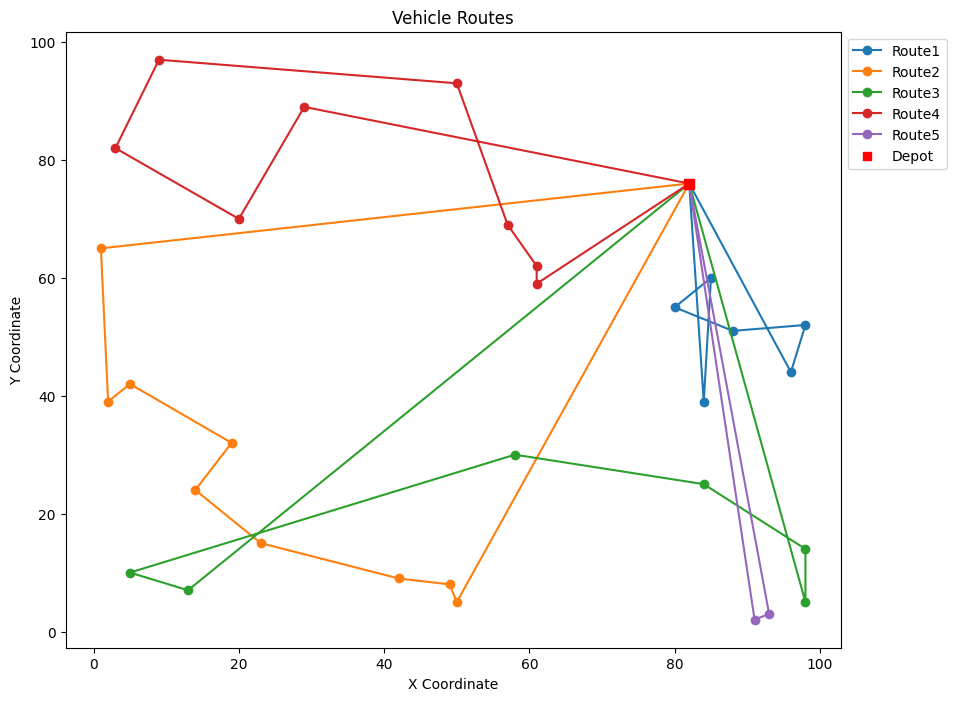

In [17]:
start = time.time()
routes = Nearest_Neighbor(distance_matrix,demands,Q,n)
end = time.time()

print_results(routes, coordinates)

### Nearest Neighbor + 3-opt

 Il metodo "Three-Opt" tenta di migliorare una soluzione esistente invertendo tre segmenti della rotta in diversi modi, con l'obiettivo di ridurre la sua lunghezza totale.

In [18]:
def three_opt(route, distance_matrix):
    
    n = len(route)                      #inizializzo le variabili
    best_route = route
    improved = True

    while improved:
        improved = False                               #inizializzo improved a falso
        for i in range(1, n - 4):                      #iterazioni sui possibili segmenti da invertire. Gli indici i, j e k rappresentano i punti di divisione della rotta in segmenti
            for j in range(i + 1, n - 3):              #n-4 assicura che ci siano 3 nodi disponibili per j e k.. e così via
                for k in range(j + 1, n - 2):
                    new_routes = generate_all_3opt_swaps(route, i, j, k)
                    for new_route in new_routes:
                        if calculate_route_length(new_route, distance_matrix) < calculate_route_length(best_route, distance_matrix):
                            best_route = new_route
                            improved = True
                            route = best_route

    return best_route

def generate_all_3opt_swaps(route, i, j, k):
    # Estrazione dei segmenti dalla rotta originale
    seg1 = route[1:i]
    seg2 = route[i:j+1]
    seg3 = route[j+1:k+1]
    seg4 = route[k+1:]
    
    new_routes = []
    
    # Non fare nulla
    new_routes.append([route[0]] + seg1 + seg2 + seg3 + seg4)
    
    # Invertire seg2
    new_routes.append([route[0]] + seg1 + seg2[::-1] + seg3 + seg4)
    
    # Invertire seg3
    new_routes.append([route[0]] + seg1 + seg2 + seg3[::-1] + seg4)
    
    # Invertire seg2 e seg3
    new_routes.append([route[0]] + seg1 + seg2[::-1] + seg3[::-1] + seg4)
    
    # Riarrangiare con inversione
    new_routes.append([route[0]] + seg1 + seg3 + seg2 + seg4)
    
    # Un'altra riarrangiamento con inversione
    new_routes.append([route[0]] + seg1 + seg3 + seg2[::-1] + seg4)
    
    # L'ultima permutazione con inversione
    new_routes.append([route[0]] + seg1 + seg3[::-1] + seg2 + seg4)
    
    return new_routes

def calculate_route_length(route, distance_matrix):
    length = 0
    for i in range(len(route) - 1):
        length += distance_matrix[route[i], route[i + 1]]    #sommo la distanza tra due nodi consecutivi
    return length




================================================== Routes ==================================================


Route 1: 	[0, 30, 26, 16, 12, 1, 7, 0]
Cost: 		100.64
Demand: 	90

Route 2: 	[0, 3, 2, 23, 28, 8, 18, 9, 22, 15, 0]
Cost: 		257.49
Demand: 	99

Route 3: 	[0, 11, 4, 6, 13, 21, 31, 0]
Cost: 		286.56
Demand: 	82

Route 4: 	[0, 20, 5, 25, 10, 29, 27, 24, 14, 0]
Cost: 		191.21
Demand: 	96

Route 5: 	[0, 17, 19, 0]
Cost: 		150.61
Demand: 	43


Total Cost: 	986.51
Total Time: 	0.00
Gap: 		25.83%


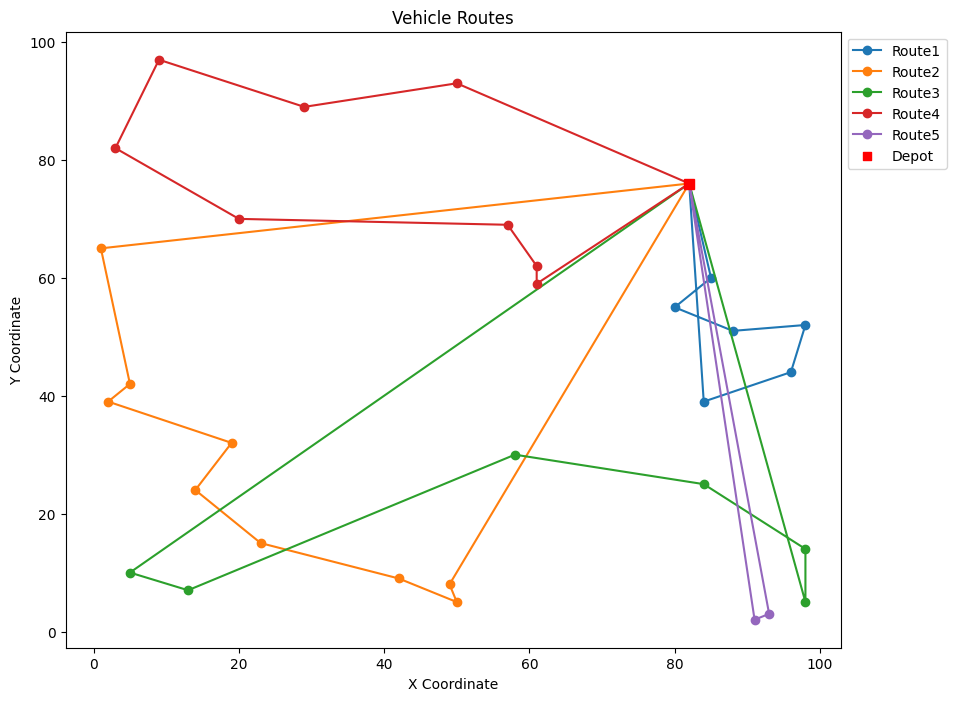

In [19]:
start = time.time()
routes = Nearest_Neighbor(distance_matrix,demands,Q,n)
for i in routes:
    route = routes[i]
    route = three_opt(route, distance_matrix)
    routes[i] = route
end = time.time()

print_results(routes, coordinates)

## **Clarke and Write**
L'algoritmo cerca di minimizzare la distanza totale percorsa dai veicoli combinando le rotte di consegna. Per ogni coppia di nodi $i$ e $j$ calcola i risparmi $s_{ij}$ che rappresentano il risparmio che si ottiene unendo due rotte che passano attraverso il deposito. I risparmi vengono ordinati in ordine decrescente per combinare prima le rotte con i risparmi più alti.

In [20]:
def Clarke_and_Wright(Q,demands,n):

    # Step 1: Calcolo dei risparmi

    savings = []
    for i in range(1, n):
        for j in range(i + 1, n):
            s_ij = distance_matrix[0, i] + distance_matrix[0, j] - distance_matrix[i, j]  #il saving è positivo se il costo per collegare
                                                                                          #due nodi è inferiore alla somma del costo del
                                                                                          #percorso di andata dal deposito al primo nodo più il costo
                                                                                          #del ritorno dal secondo nodo al deposito
            savings.append((s_ij, i, j))

    # Step 2: Ordinamento dei risparmi

    savings.sort(reverse=True, key=lambda x: x[0])

     # Costruzione delle rotte
    routes = {i: [i] for i in range(1, n)}                                      #inizializza una rotta per ogni nodo
    capacities = {i: demands[i] for i in range(1, n)}                           #capacità corrente di ciascuna rotta
    assigned_vehicles = {i: i for i in range(1, n)}                             #mappa ogni nodo al veicolo assegnato

    # Unisci le rotte basate sui risparmi
    for s, i, j in savings:
        if i in assigned_vehicles and j in assigned_vehicles:                   #se i e j sono assegnati
            if assigned_vehicles[i] != assigned_vehicles[j]:                    #se i e j sono assegnati a veicoli diversi
                vehicle_i = assigned_vehicles[i]                                #identifico il veicolo assegnato a i
                vehicle_j = assigned_vehicles[j]                                #identifico il veicolo assegnato a j
                if vehicle_i in routes and vehicle_j in routes:                 #verifico che i veicoli vehicle_i e vehicle_j abbiano delle rotte associate
                    route_i = routes[vehicle_i]                                 #recupero le rotte dei veicoli
                    route_j = routes[vehicle_j]
                    if capacities[vehicle_i] + capacities[vehicle_j] <= Q:      #verifico se l'unione delle rotte rispetta la capacità del veicolo
                        if route_i[-1] == i and route_j[0] == j:                #verifico se le rotte possono essere concatenate
                            routes[vehicle_i] = route_i + route_j               #combino route_i e route_j assegnando la nuova rotta a vehicle_i
                            capacities[vehicle_i] += capacities[vehicle_j]      #aggiungo la capacità di vehicle_j a quella di vehicle_i
                            for node in route_j:                                #assegno tutti i nodi di route_j a vehicle_i
                                assigned_vehicles[node] = vehicle_i
                            del routes[vehicle_j]                               #rimuovo vehicle_j da routes e capacities
                            del capacities[vehicle_j]

    #inserisco il nodo deposito in tutte le rotte
    for i in routes:
        route = routes[i]
        route.insert(0, 0)
        route.append(0)
        routes[i] = route

    return routes,assigned_vehicles



================================================== Routes ==================================================


Route 1: 	[0, 1, 21, 26, 0]
Cost: 		130.87
Demand: 	33

Route 2: 	[0, 2, 3, 23, 0]
Cost: 		166.14
Demand: 	35

Route 3: 	[0, 4, 11, 28, 0]
Cost: 		209.67
Demand: 	48

Route 4: 	[0, 5, 10, 15, 25, 27, 0]
Cost: 		213.13
Demand: 	81

Route 5: 	[0, 6, 8, 9, 22, 29, 0]
Cost: 		213.80
Demand: 	40

Route 6: 	[0, 7, 13, 17, 19, 31, 0]
Cost: 		155.50
Demand: 	84

Route 7: 	[0, 12, 16, 30, 0]
Cost: 		64.66
Demand: 	53

Route 8: 	[0, 14, 18, 24, 0]
Cost: 		153.80
Demand: 	28

Route 9: 	[0, 20, 0]
Cost: 		72.47
Demand: 	8


Total Cost: 	1380.04
Total Time: 	0.00
Gap: 		76.03%


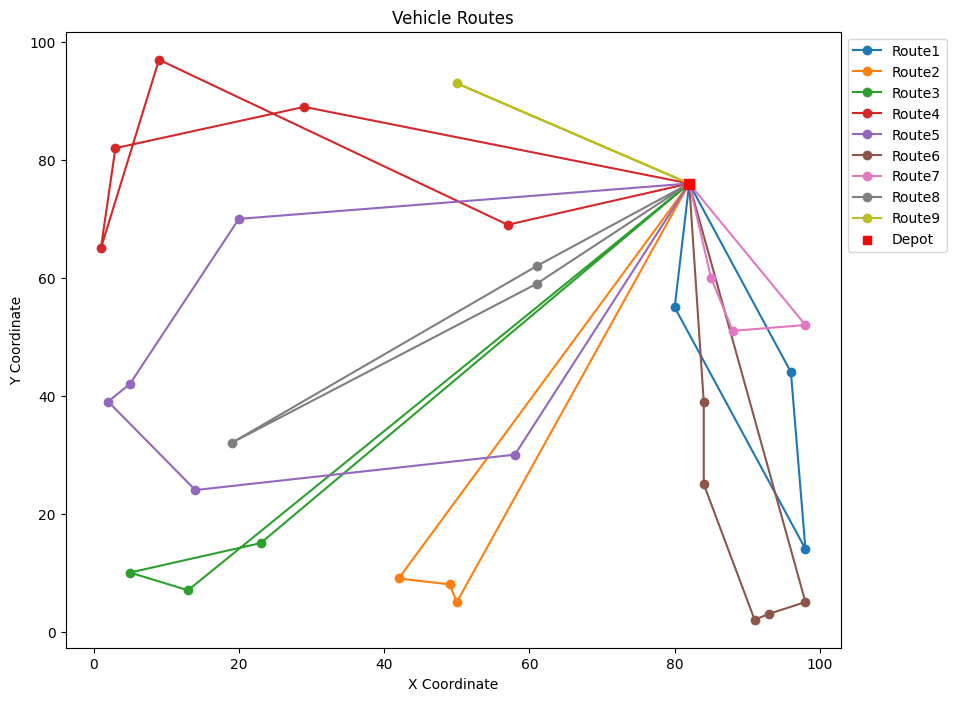

In [21]:
start = time.time()
routes,_ = Clarke_and_Wright(Q,demands,n)
end = time.time()

print_results(routes, coordinates)

## **Clarke and Write Modificato**

 L'obiettivo è di combinare le rotte esistenti in modo da ridurre il numero totale di rotte a un valore minimo k, mentre si rispettano le capacità dei veicoli e si massimizzano i risparmi attraverso la fusione delle rotte. Per bilanciare meglio i nodi lungo i percorsi, la capacità del veicolo è adattata al valore massimo di richiesta.

In [22]:
def Clarke_Wright_fusion(routes,distance_matrix,demands,Q,assigned_vehicles,k):

    while len(routes) > k:    #Continua finché il numero di rotte è maggiore di k
        # Trovo le due rotte con i costi di combinazione minimi
        best_savings = None
        best_i, best_j = None, None
        for i in routes:        #per ogni coppia di rotte i!=j
            for j in routes:
                if i != j:
                    # Calcolo i risparmi per combinare le rotte i e j
                    route_i = routes[i]
                    route_j = routes[j]
                    #stavolta  Il risparmio è calcolato come la differenza tra il costo di inviare il veicolo dal penultimo nodo di route_i
                    #al deposito e poi dal deposito al primo nodo di route_j meno il costo diretto dall'ultimo nodo di route_i al primo nodo di route_j
                    saving = distance_matrix[route_i[-2], 0] + distance_matrix[0, route_j[1]] - distance_matrix[route_i[-2], route_j[1]]
                    if best_savings is None or saving > best_savings: #verifica del risparmio
                        if sum(demands[node] for node in route_i) + sum(demands[node] for node in route_j) < Q:  #vincolo capacità del veicolo
                            best_savings = saving
                            best_i = i
                            best_j = j
        if best_i is not None and best_j is not None:                 #se trovo un risparmio
            # Combina le rotte best_i e best_j
            routes_best_i = routes[best_i]
            routes_best_j = routes[best_j]
            routes[best_i] = routes_best_i[:-1] + routes_best_j[1:]   #combino gli ultimi nodi di routes_best_i con i primi nodi di routes_best_j.

            for node in routes[best_j]:
                assigned_vehicles[node] = best_i                      #Tutti i nodi di routes[best_j] vengono assegnati a best_i.
            del routes[best_j]                                        #routes[best_j] viene eliminato dalla lista delle rotte.
        else:
            break
    return routes,assigned_vehicles



================================================== Routes ==================================================


Route 1: 	[0, 6, 9, 22, 8, 11, 18, 28, 4, 14, 0]
Cost: 		303.75
Demand: 	90

Route 2: 	[0, 16, 12, 1, 7, 13, 26, 0]
Cost: 		122.37
Demand: 	92

Route 3: 	[0, 21, 31, 17, 19, 2, 3, 23, 0]
Cost: 		214.19
Demand: 	99

Route 4: 	[0, 24, 30, 0]
Cost: 		65.60
Demand: 	38

Route 5: 	[0, 27, 25, 15, 29, 5, 10, 20, 0]
Cost: 		266.62
Demand: 	91


Total Cost: 	972.53
Total Time: 	0.00
Gap: 		24.05%


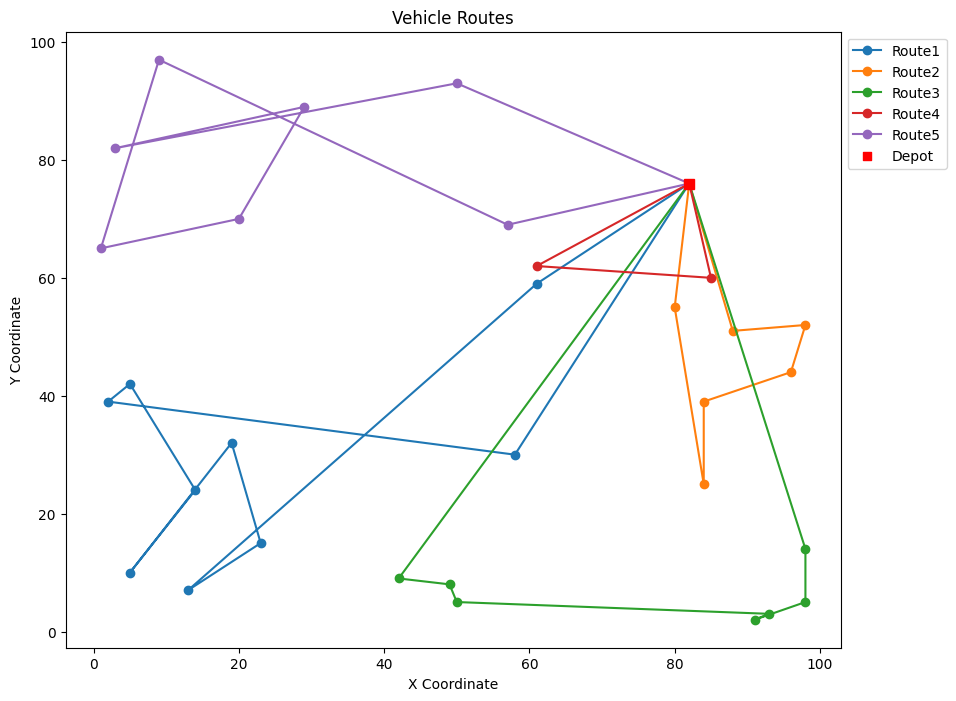

In [23]:
#Adatto la capacità del veicolo al valore massimo di richiesta
#Al fine di creare dei percorsi bilanciati
Q1 = max(demands.values()) #+ min(demands.values()) - 5

start = time.time()
routes,assigned_vehicles = Clarke_and_Wright(Q1,demands,n)
routes,_ = Clarke_Wright_fusion(routes,distance_matrix,demands,Q,assigned_vehicles,k)
end = time.time()

print_results(routes, coordinates)

### Miglioramento con 3-opt



================================================== Routes ==================================================


Route 1: 	[0, 6, 28, 4, 11, 8, 18, 9, 22, 14, 0]
Cost: 		245.56
Demand: 	90

Route 2: 	[0, 16, 12, 1, 13, 7, 26, 0]
Cost: 		118.07
Demand: 	92

Route 3: 	[0, 21, 31, 19, 17, 2, 3, 23, 0]
Cost: 		210.03
Demand: 	99

Route 4: 	[0, 24, 30, 0]
Cost: 		65.60
Demand: 	38

Route 5: 	[0, 27, 29, 15, 10, 25, 5, 20, 0]
Cost: 		195.05
Demand: 	91


Total Cost: 	834.30
Total Time: 	0.01
Gap: 		6.42%


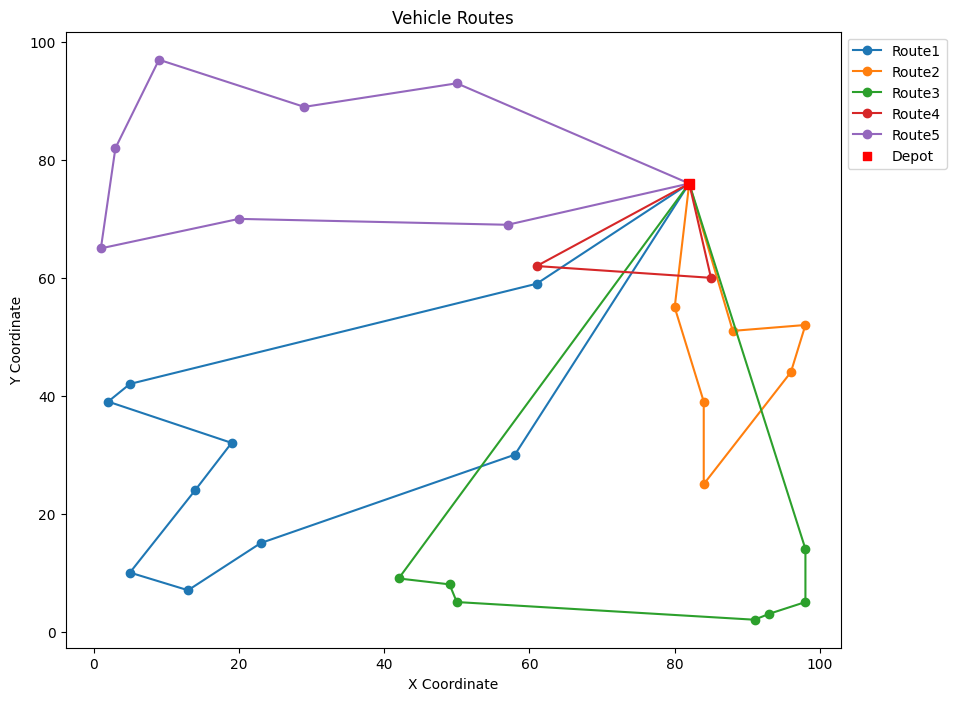

In [24]:
start = time.time()
for i in routes:
    route = routes[i]
    route = three_opt(route, distance_matrix)
    routes[i] = route
end = time.time()

print_results(routes, coordinates)

## **Nearest Neighbor + Clarke and Write + 3-opt**
L'algoritmo finale utilizza l'euristica Nearest Neighbor per inizializzare i percorsi, adattando la capacità dei veicoli al valore massimo di richiesta, in modo da distribuire più equamente i nodi lungo i percorsi. Successivamente, fa uso dell'euristica Clarke and Write per fondere i percorsi che generano un risparmio e ottimizza la soluzione trovata con la tecnica 3-opt.



================================================== Routes ==================================================


Route 1: 	[0, 14, 6, 13, 7, 1, 12, 0]
Cost: 		146.74
Demand: 	87

Route 2: 	[0, 21, 31, 17, 19, 2, 3, 23, 0]
Cost: 		214.19
Demand: 	99

Route 3: 	[0, 24, 27, 5, 29, 10, 25, 20, 0]
Cost: 		203.13
Demand: 	93

Route 4: 	[0, 28, 4, 11, 8, 18, 22, 9, 15, 0]
Cost: 		261.50
Demand: 	97

Route 5: 	[0, 30, 16, 26, 0]
Cost: 		55.80
Demand: 	34


Total Cost: 	881.37
Total Time: 	0.00
Gap: 		12.42%


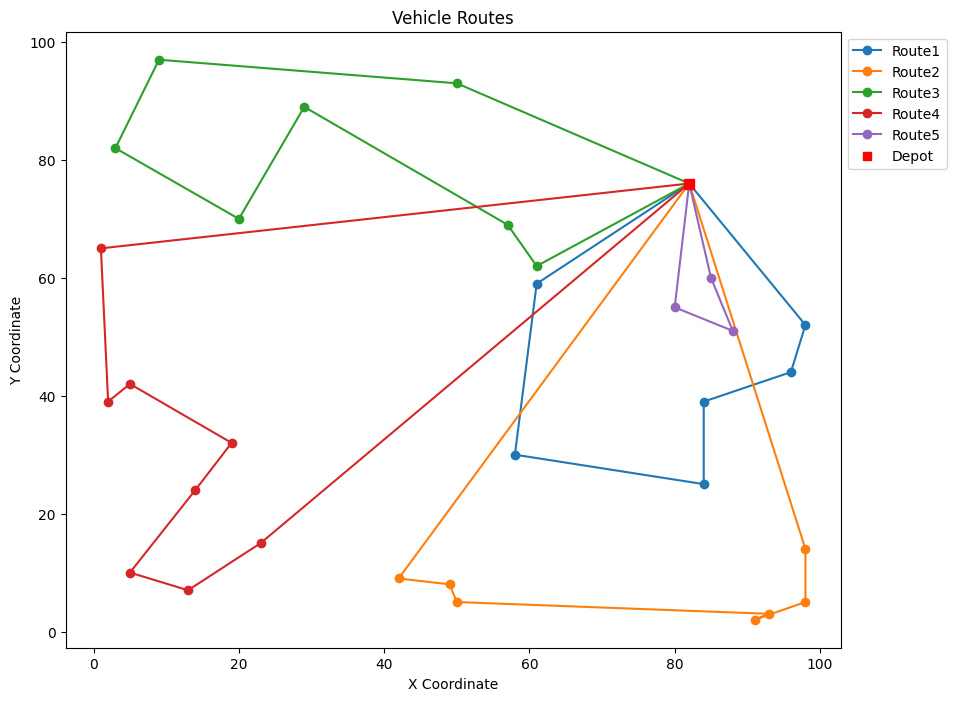

In [25]:
#Adatto la capacità del veicolo al valore massimo di richiesta
#Al fine di creare dei percorsi bilanciati
Q1 = max(demands.values())

start = time.time()
routes = Nearest_Neighbor(distance_matrix,demands,Q1,n) #utilizzo NN per iniziliazzare i percorsi
assigned_vehicles = {}
for i in routes:
    route = routes[i]
    for elem in route:
        assigned_vehicles[elem] = i
routes,_ = Clarke_Wright_fusion(routes,distance_matrix,demands,Q,assigned_vehicles,k)
end = time.time()

print_results(routes, coordinates)



================================================== Routes ==================================================


Route 1: 	[0, 14, 6, 13, 7, 1, 12, 0]
Cost: 		146.74
Demand: 	87

Route 2: 	[0, 21, 31, 19, 17, 2, 3, 23, 0]
Cost: 		210.03
Demand: 	99

Route 3: 	[0, 24, 27, 29, 10, 25, 5, 20, 0]
Cost: 		186.43
Demand: 	93

Route 4: 	[0, 18, 8, 28, 4, 11, 9, 22, 15, 0]
Cost: 		258.84
Demand: 	97

Route 5: 	[0, 30, 16, 26, 0]
Cost: 		55.80
Demand: 	34


Total Cost: 	857.85
Total Time: 	0.01
Gap: 		9.42%


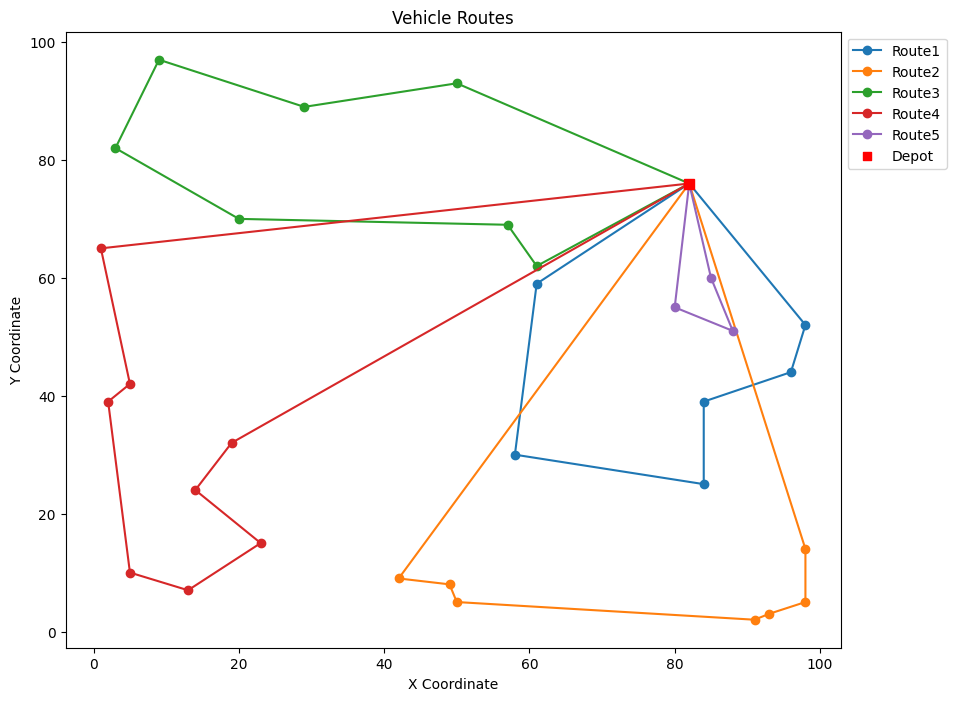

In [26]:
start = time.time()
for i in routes:
    route = routes[i]
    route = three_opt(route, distance_matrix)
    routes[i] = route
end = time.time()

print_results(routes, coordinates)